# CLaMM Dataset

In [9]:
%matplotlib inline

import random
import numpy as np
import os
from PIL import Image

import matplotlib.pyplot as plt

In [2]:
root_dir = '.'
img_dir = os.path.join(root_dir, 'images')

filecsv_train = "@CLaMM-filelist.csv"
filecsv_test = "@CLaMM_task1.csv"

csv_train = np.loadtxt(os.path.join(img_dir, filecsv_train), delimiter=";", dtype=str)
csv_test = np.loadtxt(os.path.join(img_dir, filecsv_test), delimiter=";", dtype=str)

files_train = csv_train[1:,0]
labels_train = csv_train[1:,1]

files_test = csv_test[1:,0]
labels_test = csv_test[1:,1]

labels_train_uniq = np.unique(labels_train)
labels_test_uniq = np.unique(labels_test)

print("Train labels ", labels_train_uniq)
print("\n")
print("Test labels ", labels_test_uniq)

Train labels  ['Caroline' 'Cursiva' 'Half_uncial' 'Humanistic' 'Humanistic_Cursive'
 'Hybrida' 'Praegothica' 'Semihybrida' 'Semitextualis'
 'Southern_Textualis' 'Textualis' 'Uncial']


Test labels  ['Caroline' 'Cursiva' 'Half_uncial' 'Humanistic' 'Humanistic_cursive'
 'Hybrida' 'Praegothica' 'Semihybrida' 'Semitextualis '
 'Southern_Textualis' 'Textualis' 'Uncial']


## Label Distribution and Checking

In [ ]:
# Some classes are written in different manners in the train/test csv.
# Formatting the class indexes separately, both given in alphabetical order (labels_train_uniq, labels_test_uniq)

In [3]:
for idx in range(len(labels_train_uniq)):
    are_equal = labels_train_uniq[idx] == labels_test_uniq[idx]
    if not(are_equal):
        print("The name of Class {} in train csv differs from the one in test csv {}".format(labels_train_uniq[idx],
                                                                                             labels_test_uniq[idx]))

The name of Class Humanistic_Cursive in train csv differs from the one in test csv Humanistic_cursive
The name of Class Semitextualis in train csv differs from the one in test csv Semitextualis 


In [4]:
class_idxs = list(range(len(labels_train_uniq)))

filelab_train = dict(zip(files_train, labels_train))
filelab_test = dict(zip(files_test, labels_test))

labind_train = dict(zip(labels_train_uniq, class_idxs))
labind_test = dict(zip(labels_test_uniq, class_idxs))

print("Train labels-idxs mapping ", labind_train)
print("\n")
print("Test labels-idxs mapping ", labind_test)

Train labels-idxs mapping  {'Caroline': 0, 'Cursiva': 1, 'Half_uncial': 2, 'Humanistic': 3, 'Humanistic_Cursive': 4, 'Hybrida': 5, 'Praegothica': 6, 'Semihybrida': 7, 'Semitextualis': 8, 'Southern_Textualis': 9, 'Textualis': 10, 'Uncial': 11}


Test labels-idxs mapping  {'Caroline': 0, 'Cursiva': 1, 'Half_uncial': 2, 'Humanistic': 3, 'Humanistic_cursive': 4, 'Hybrida': 5, 'Praegothica': 6, 'Semihybrida': 7, 'Semitextualis ': 8, 'Southern_Textualis': 9, 'Textualis': 10, 'Uncial': 11}


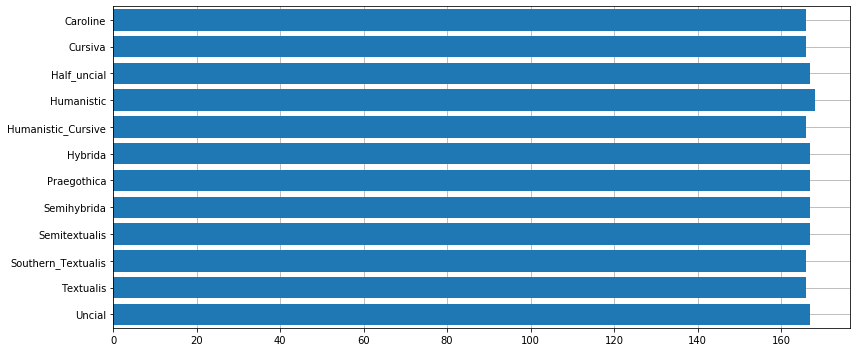

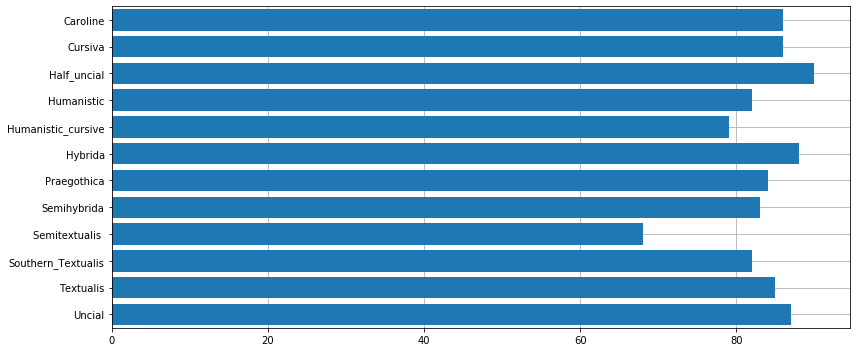

Total training images  2000
Total testing images  1000
Minimum number of images per class in test set  68
Maximum number of images per class in test set  90


In [9]:
img_counts_train = [np.sum(lbl == labels_train) for lbl in labels_train_uniq]
img_counts_test = [np.sum(lbl == labels_test) for lbl in labels_test_uniq]

plt.figure(figsize=(12, 5))
plt.barh(np.arange(len(labels_train_uniq)), img_counts_train)
plt.yticks(np.arange(len(labels_train_uniq)), labels_train_uniq)
plt.ylim(len(labels_train_uniq) - 0.5, -0.5)
plt.grid()
plt.gca().set_axisbelow(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.barh(np.arange(len(labels_test_uniq)), img_counts_test)
plt.yticks(np.arange(len(labels_test_uniq)), labels_test_uniq)
plt.ylim(len(labels_test_uniq) - 0.5, -0.5)
plt.grid()
plt.gca().set_axisbelow(True)
plt.tight_layout()
plt.show()

print("Total training images ", sum(img_counts_train))
print("Total testing images ", sum(img_counts_test))
print("Minimum number of images per class in test set ", min(img_counts_test))
print("Maximum number of images per class in test set ", max(img_counts_test))

## Example Images

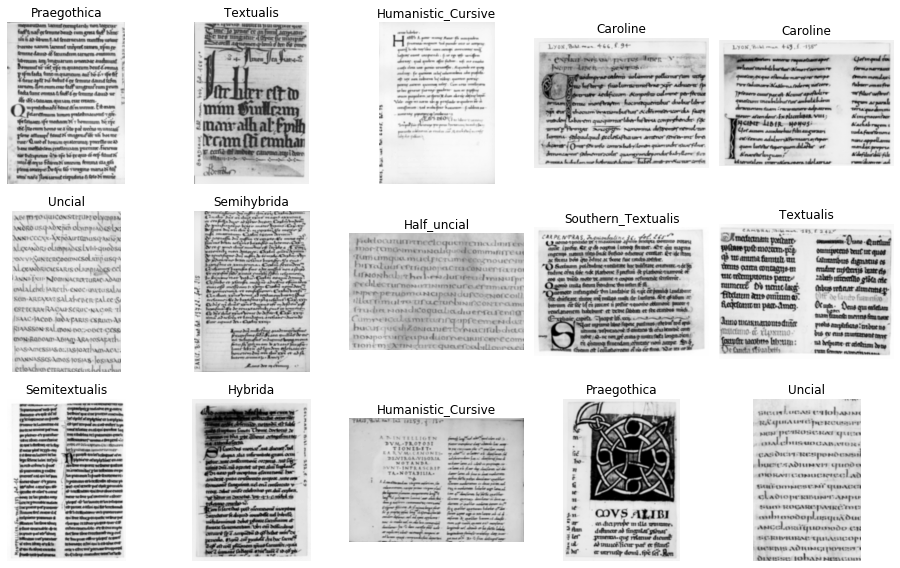

In [12]:
fig, axes = plt.subplots(3, 5, figsize=(13, 8))
for ax in axes.ravel():
    img = random.choice(files_train)
    lbl = filelab_train[img]
    fn = os.path.join(img_dir, img)
    ax.set_title(lbl)
    ax.imshow(plt.imread(fn), interpolation='bicubic', cmap="gray")
    ax.axis('off')
fig.tight_layout()
plt.show()

fig.savefig("example_images.png", transparent=True)

## Train/Val/Test Split

    Train:  30 imgs/class
    Val:    20 imgs/class
    Test: 68-90 imgs/class (official split)

In [15]:
num_train = 30
num_val = 20
np.random.seed(1)

perm_idxs_train = [np.random.permutation(np.where(lbl == labels_train)[0]) for lbl in labels_train_uniq]

train_out = [[] for _ in range(len(labels_train_uniq))]
val_out = [[] for _ in range(len(labels_train_uniq))]
trainval_out = [[] for _ in range(len(labels_train_uniq))]


for idx_cl, file_idxs in enumerate(perm_idxs_train):
    for count, file_id in enumerate(file_idxs):
        
        fn = files_train[file_id]
        lb = filelab_train[fn]
        lb_idx = labind_train[lb]
        fn_noext = fn.split(".")[0]
        a = os.path.isfile(os.path.join(img_dir, fn))
        
        if count < num_train:
            split_name = "train"
            print("File: {:<20} Class: {:<15} \t Class-idx: {} \t Exists: {} \t Split: {}".format(fn_noext, lb, lb_idx, a, split_name))
            train_out[idx_cl].append([fn_noext, lb_idx])
            trainval_out[idx_cl].append([fn_noext, lb_idx])
            
        elif (count >= num_train) and (count < num_train + num_val):
            split_name = "val"
            print("File: {:<20} Class: {:<15} \t Class-idx: {} \t Exists: {} \t Split: {}".format(fn_noext, lb, lb_idx, a, split_name))
            val_out[idx_cl].append([fn_noext, lb_idx])
            trainval_out[idx_cl].append([fn_noext, lb_idx])
        else:
            split_name = "none"
            print("File: {:<20} Class: {:<15} \t Class-idx: {} \t Exists: {} \t Split: {}".format(fn_noext, lb, lb_idx, a, split_name))
            pass

train_out = np.reshape(train_out, (-1, 2))
val_out = np.reshape(val_out, (-1, 2))
trainval_out = np.reshape(trainval_out, (-1, 2))

File: IRHT_P_001951        Class: Caroline        	 Class-idx: 0 	 Exists: True 	 Split: train
File: IRHT_P_001954        Class: Caroline        	 Class-idx: 0 	 Exists: True 	 Split: train
File: IRHT_P_006462        Class: Caroline        	 Class-idx: 0 	 Exists: True 	 Split: train
File: IRHT_P_002016        Class: Caroline        	 Class-idx: 0 	 Exists: True 	 Split: train
File: IRHT_P_006495        Class: Caroline        	 Class-idx: 0 	 Exists: True 	 Split: train
File: btv1b8452767n_f296   Class: Caroline        	 Class-idx: 0 	 Exists: True 	 Split: train
File: IRHT_P_002117        Class: Caroline        	 Class-idx: 0 	 Exists: True 	 Split: train
File: IRHT_P_000870        Class: Caroline        	 Class-idx: 0 	 Exists: True 	 Split: train
File: IRHT_P_002458        Class: Caroline        	 Class-idx: 0 	 Exists: True 	 Split: train
File: btv1b8452767n_f74    Class: Caroline        	 Class-idx: 0 	 Exists: True 	 Split: train
File: IRHT_P_002517        Class: Caroline        

In [16]:
test_out = []

for _, fn in enumerate(files_test): 
    
    lb = filelab_test[fn]
    lb_idx = labind_test[lb]
    fn_noext = fn.split(".")[0]
    a = os.path.isfile(os.path.join(img_dir, fn))

    split_name = "test"
    print("File: {:<30} Class: {:<15} \t Class-idx: {} \t Exists: {} \t Split: {}".format(fn_noext, lb, lb_idx, a, split_name))
    test_out.append([fn_noext, lb_idx])

test_out = np.array(test_out)

File: btv1b10506542j_f104            Class: Caroline        	 Class-idx: 0 	 Exists: True 	 Split: test
File: btv1b8423836x_f125             Class: Caroline        	 Class-idx: 0 	 Exists: True 	 Split: test
File: btv1b8423836x_f19              Class: Caroline        	 Class-idx: 0 	 Exists: True 	 Split: test
File: btv1b8423836x_f24              Class: Caroline        	 Class-idx: 0 	 Exists: True 	 Split: test
File: btv1b8423836x_f47              Class: Caroline        	 Class-idx: 0 	 Exists: True 	 Split: test
File: btv1b84267798_f150             Class: Caroline        	 Class-idx: 0 	 Exists: True 	 Split: test
File: btv1b84267798_f27              Class: Caroline        	 Class-idx: 0 	 Exists: True 	 Split: test
File: btv1b84267798_f87              Class: Caroline        	 Class-idx: 0 	 Exists: True 	 Split: test
File: btv1b8426780x_f101             Class: Caroline        	 Class-idx: 0 	 Exists: True 	 Split: test
File: btv1b8426780x_f133             Class: Caroline        	 Cl

In [17]:
np.savetxt(os.path.join(root_dir, 'train.txt'), train_out, fmt=['%s','%s'])
np.savetxt(os.path.join(root_dir, 'val.txt'), val_out, fmt=['%s','%s'])
np.savetxt(os.path.join(root_dir, 'trainval.txt'), trainval_out, fmt=['%s','%s'])
np.savetxt(os.path.join(root_dir, 'test.txt'), test_out, fmt=['%s','%s'])

## Image Sizes and Aspect Ratios in the trainval split

In [5]:
trainval_files = []
with open(os.path.join(root_dir, 'trainval.txt')) as f:
    trainval_files = [l.strip().split()[0] + '.tif' for l in f]
len(trainval_files)

600

In [8]:
img_sizes = np.array([Image.open(os.path.join(img_dir, fn)).size for fn in trainval_files])

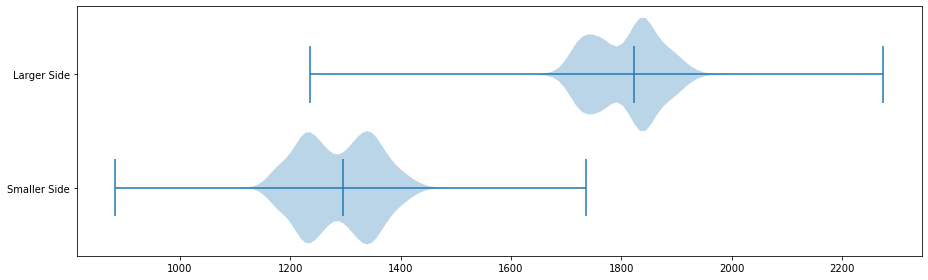

In [11]:
plt.figure(figsize=(13, 4))
plt.violinplot(np.sort(img_sizes, axis=-1), widths=1, vert=False, showmedians=True)
plt.yticks([1,2], ['Smaller Side', 'Larger Side'])
plt.tight_layout()
plt.show()

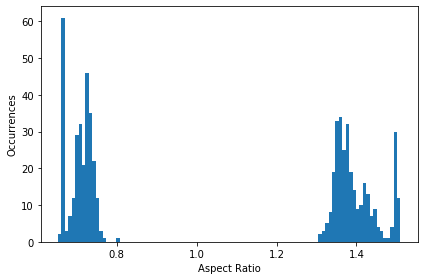

In [14]:
plt.hist(img_sizes[:,0] / img_sizes[:,1], bins=100)
plt.xlabel('Aspect Ratio')
plt.ylabel('Occurrences')
plt.tight_layout()
plt.show()